In [ ]:
#TEST 1 T = 0.028600692749023438  FPS = 34.9650
#TEST 2 T = 0.0012826919555664062 FPS = 779,666302
#TEST 3 T = 0.0026836395263671875 FPS = 384.6153
#TEST 4 T = 0.0012586116790771484 FPS = 794,533608

## TIMING TEST FOR CHANNEL SIZE
## SIZE = 720 T = 0.30511
## SIZE = 7200 T = 0.11


In [10]:
import numpy as np
import cv2
import time
from pynq import Overlay
import pynq.lib.dma
from PIL import Image
from pynq import Xlnk
import random
import matplotlib.pyplot as plt
import time

OVERLAY = 'sobel.bit'

In [11]:
frame_in = Image.open('lena.jpg')
img_in = np.array(frame_in)

In [12]:
ol = Overlay(OVERLAY)
ol?
dma = ol.axi_dma_0
canny_edge=ol.canny_edge_0
#xlnk = Xlnk()
#in_buffer = xlnk.cma_array(shape=(512,512), dtype=np.uint8)
#out_buffer = xlnk.cma_array(shape=(512,512), dtype=np.uint8)
#CREATE CONTIGOUS MEMORY ALLOCATED BUFFERS THROUGH XLNK

In [4]:
in_buffer = xlnk.cma_array(shape=(512, 512, 3), 
                           dtype=np.uint8, cacheable=1)
out_buffer = xlnk.cma_array(shape=(new_height, new_width, 3), 
                            dtype=np.uint8, cacheable=1)

NameError: name 'xlnk' is not defined

In [14]:
xlnk = Xlnk()
image_buffer  = xlnk.cma_array(shape=(512,512), dtype=np.uint8)
out_buffer = xlnk.cma_array(shape=(512,512), dtype=np.uint8)

np.copyto(image_buffer,img_in)

In [38]:
t = time.time()
canny_edge.write(0x14, 512)
canny_edge.write(0x1c, 512)
canny_edge.write(0x24, 100)
canny_edge.write(0x2c, 200)

def run_kernel():
    dma.sendchannel.transfer(image_buffer)
    dma.recvchannel.transfer(out_buffer)    
    canny_edge.write(0x00,0x81) # start
    dma.sendchannel.wait()
    dma.recvchannel.wait()

run_kernel()

print(time.time() - t)
#result = Image.fromarray(out_buffer)
#display(result)
#print("Resized in Hardware(PL): {}x{} pixels.".format(new_width, new_height))

0.007060050964355469


ContiguousArray([[0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 ..., 
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

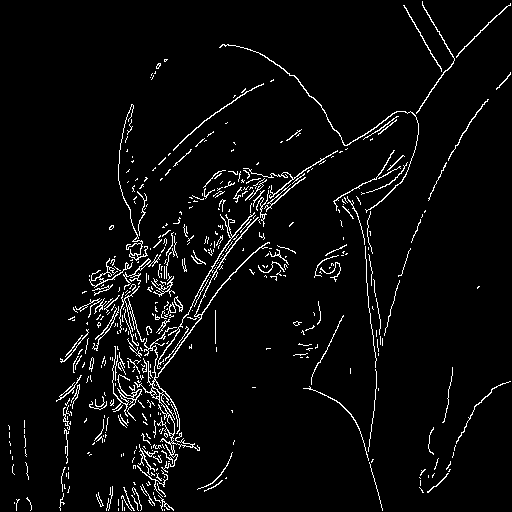

In [39]:
display(out_buffer)
img_cv2pynq_1 = Image.fromarray(out_buffer.astype('uint8'))
img_cv2pynq_1
#cv2.imwrite('output,jpg',out_buffer)

In [ ]:
from pynq import MMIO
ip = MMIO(0x43C00000,0x10000)
ip.write(0x10 , 150 % 256)
ip.write(0x18,100 % 256)
ip.read(0x10)
ip.read(0x18)
#SET THE REGISTER'S VALUES OF HYSTHERESIS 

In [ ]:
img = cv2.imread('prova.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#LOAD THE IMAGE AND CONVERT TO GRAY

In [ ]:
dma.sendchannel.start()
dma.recvchannel.start()
#START THE DMA

In [ ]:
img = cv2.imread('prova.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
np.copyto(in_buffer,img)
t = time.time()
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
print(time.time() - t)
#EXECUTE THE TRANSFER FROM PS --> PL AND PL --> PS

In [ ]:
img = cv2.imread('prova.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
t = time.time()
img = cv2.Canny(img,100,100)
print(time.time() - t)

In [ ]:
plt.imshow(out_buffer, cmap='gray')

In [ ]:
dma.recvchannel.stop()
dma.sendchannel.stop()
#STOP THE DMA

In [ ]:
from pynq import GPIO
buttons = ol.buttons_gpio.channel1
buttons.setdirection('in')
buttons.setlength(4)
buttons[0].read()
leds = ol.leds_gpio.channel1
leds.setdirection('inout')
leds.setlength(4)

In [ ]:
leds[0].on()
leds[2].off()
leds[3].off()

In [ ]:
switches = ol.switches_gpio.channel1;
switches.setdirection('in')
switches.setlength(2)
switches[1].read()

In [ ]:
high = 100
low = 50
while (buttons[0].read() == 0):
    if(switches[1].read() == 1):
        leds[0].on()
        if(buttons[3].read() == 1):
            high = high +10;
        elif(buttons[2].read() == 1):
            high = high - 10;
    else:
        leds[0].off()
        if(buttons[3].read() == 1):
            low = high +10;
        elif(buttons[2].read() == 1):
            low = low - 10;
    ip.write(0x10 ,low)
    ip.write(0x18,high)
    print('high ' + str(high) + ' low' + str(low))